## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [3]:
!pip install pandas_datareader

     -------------------------------------- 109.5/109.5 kB 1.3 MB/s eta 0:00:00


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

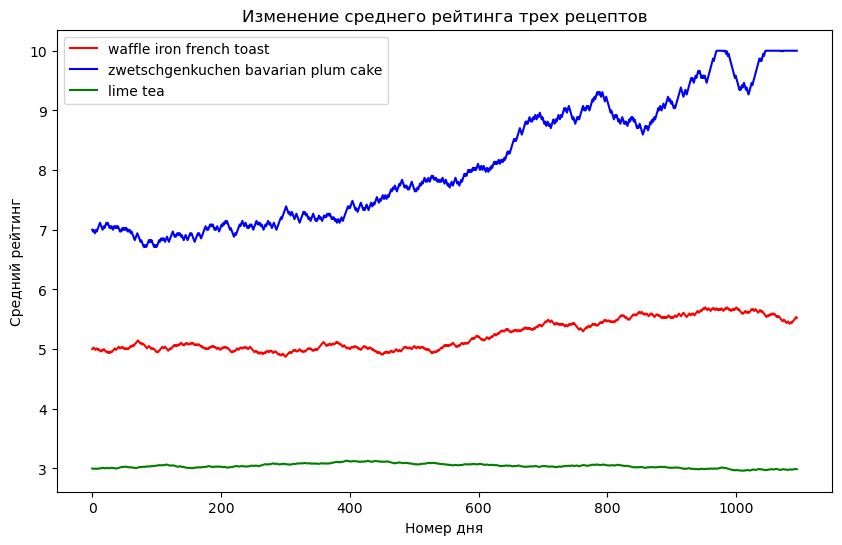

In [5]:
average_ratings = np.load("average_ratings.npy")

days = np.arange(0, average_ratings.shape[1])
plt.figure(figsize=(10, 6))
plt.plot(days, average_ratings[0], label="waffle iron french toast", color="red")
plt.plot(days, average_ratings[1], label="zwetschgenkuchen bavarian plum cake", color="blue")
plt.plot(days, average_ratings[2], label="lime tea", color="green")
plt.xlabel("Номер дня")
plt.ylabel("Средний рейтинг")
plt.title("Изменение среднего рейтинга трех рецептов")

plt.legend()
plt.show()


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


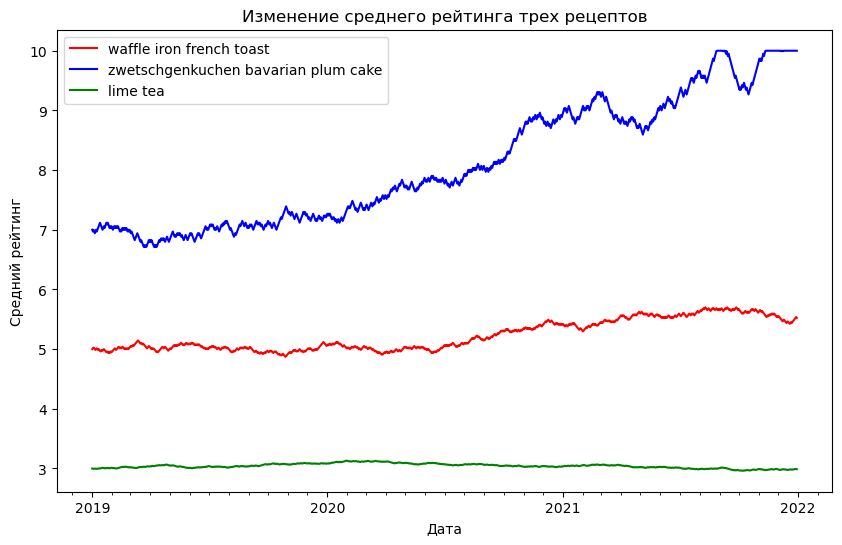

In [6]:
from datetime import date, timedelta

average_ratings = np.load("average_ratings.npy")
start_date = date(2019, 1, 1)
end_date = date(2021, 12, 30)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(date_range, average_ratings[0], label="waffle iron french toast", color="red")
ax.plot(date_range, average_ratings[1], label="zwetschgenkuchen bavarian plum cake", color="blue")
ax.plot(date_range, average_ratings[2], label="lime tea", color="green")

ax.set_xlabel("Дата")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.legend()
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

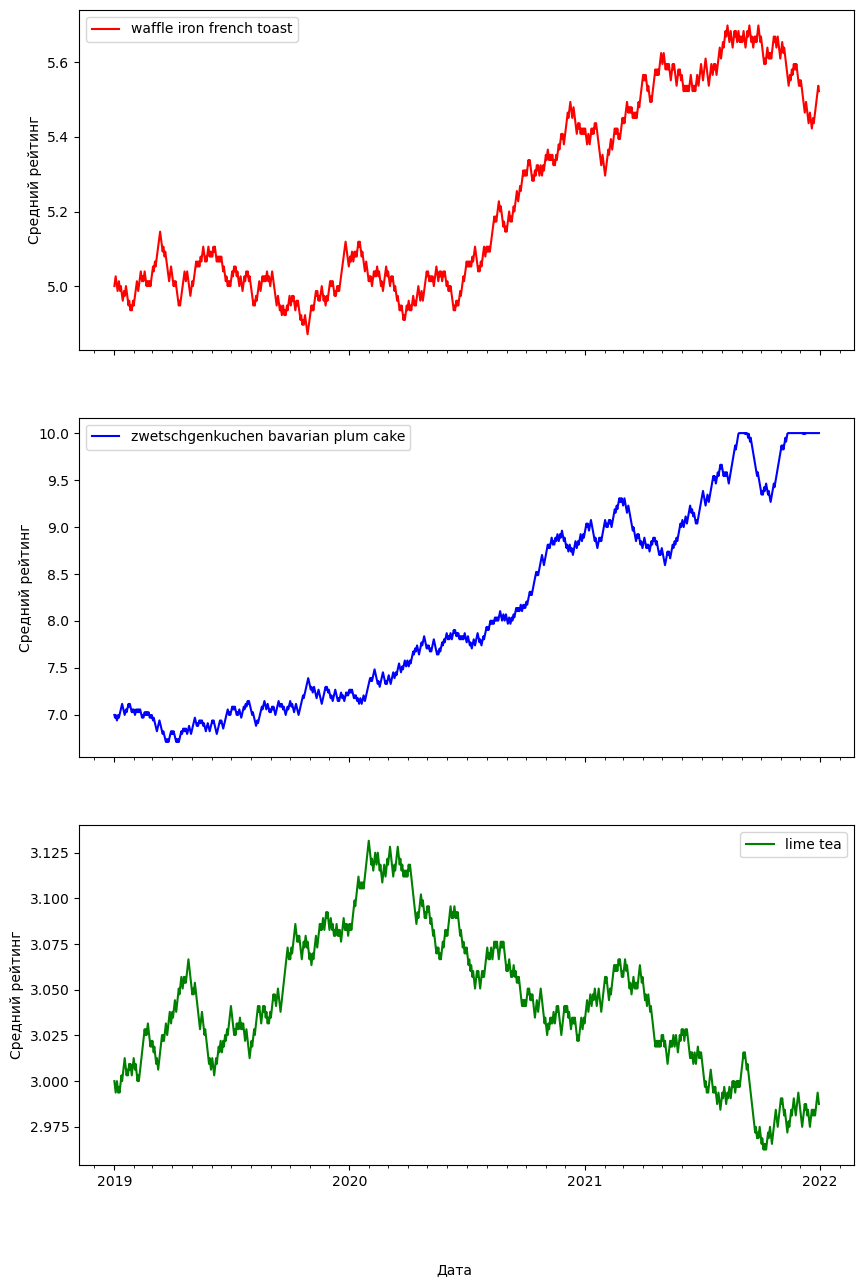

In [7]:
average_ratings = np.load("average_ratings.npy")

start_date = date(2019, 1, 1)
end_date = date(2021, 12, 30)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
recipes = [
    "waffle iron french toast",
    "zwetschgenkuchen bavarian plum cake",
    "lime tea"
]

colors = ["red", "blue", "green"]
for i in range(3):
    axs[i].plot(date_range, average_ratings[i], label=recipes[i], color=colors[i])
    axs[i].set_ylabel("Средний рейтинг")
    axs[i].legend()

axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
axs[2].xaxis.set_minor_locator(mdates.MonthLocator())

fig.text(0.5, 0.04, "Дата", ha="center", va="center")

plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


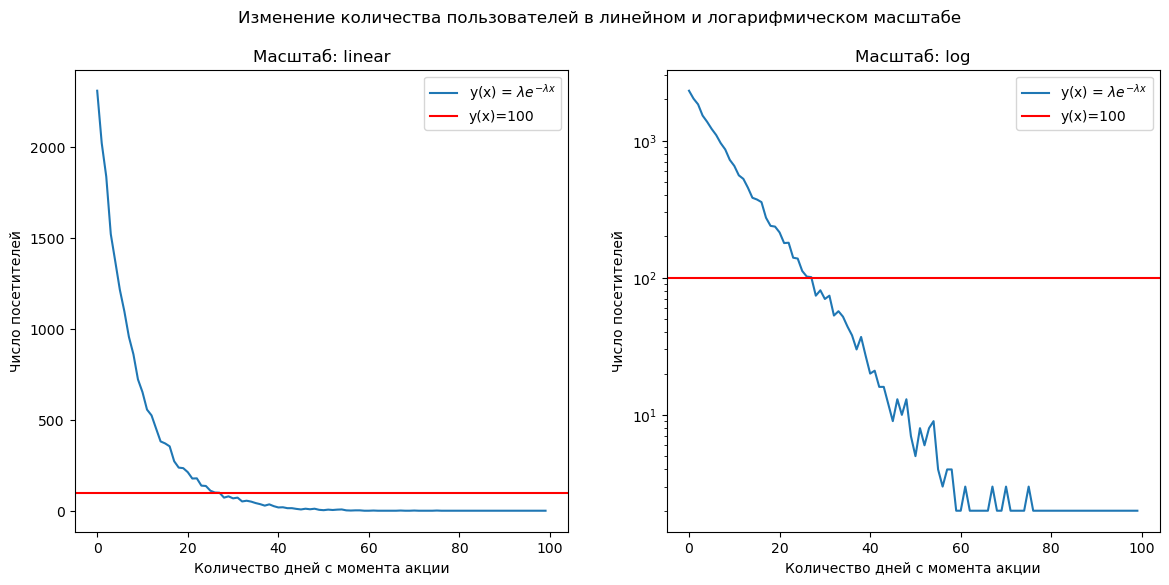

In [8]:
visitors = np.load("visitors.npy")

days = np.arange(0, len(visitors))
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе")

for ax, scale in zip(axs, ['linear', 'log']):
    ax.plot(days, visitors, label=r'y(x) = $\lambda e^{-\lambda x}$')
    ax.axhline(y=100, color='r', linestyle='-', label='y(x)=100')
    
    ax.set_title(f"Масштаб: {scale}")
    ax.set_xlabel("Количество дней с момента акции")
    ax.set_ylabel("Число посетителей")
    ax.set_yscale(scale)
    ax.legend()

plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [9]:
reviews = pd.read_csv("reviews_sample.csv")
recipes = pd.read_csv("recipes_sample.csv")

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

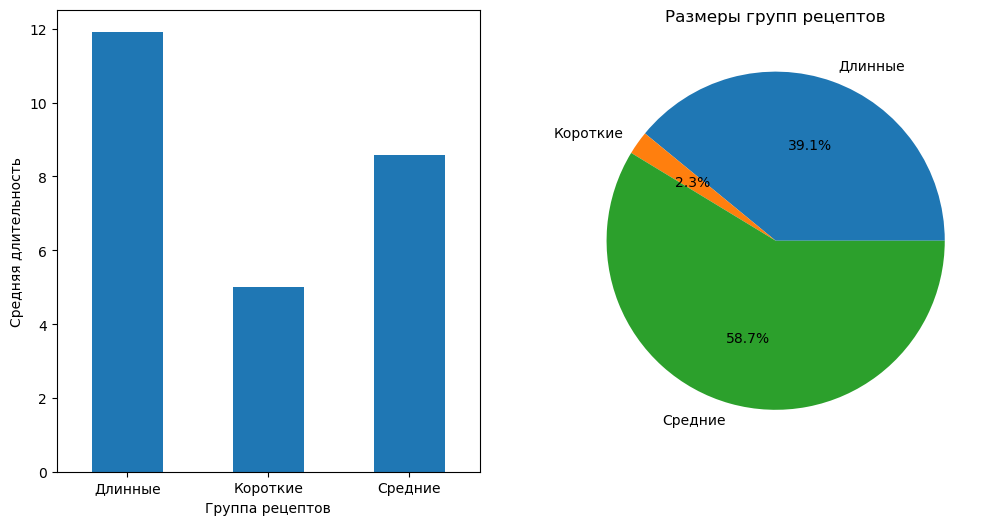

In [10]:
def categorize_duration(duration):
    if duration < 5:
        return "Короткие"
    elif 5 <= duration < 50:
        return "Средние"
    else:
        return "Длинные"

recipes["group"] = recipes["minutes"].apply(categorize_duration)
grouped = recipes.groupby("group").agg({"n_steps": "mean", "group": "count"}).rename(columns={"group": "count"})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
grouped["n_steps"].plot(kind="bar", ax=ax1, rot=0)
ax1.set_xlabel("Группа рецептов")
ax1.set_ylabel("Средняя длительность")
grouped["count"].plot(kind="pie", ax=ax2, autopct="%.1f%%", legend=False)
ax2.set_ylabel("")
ax2.set_title("Размеры групп рецептов")

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

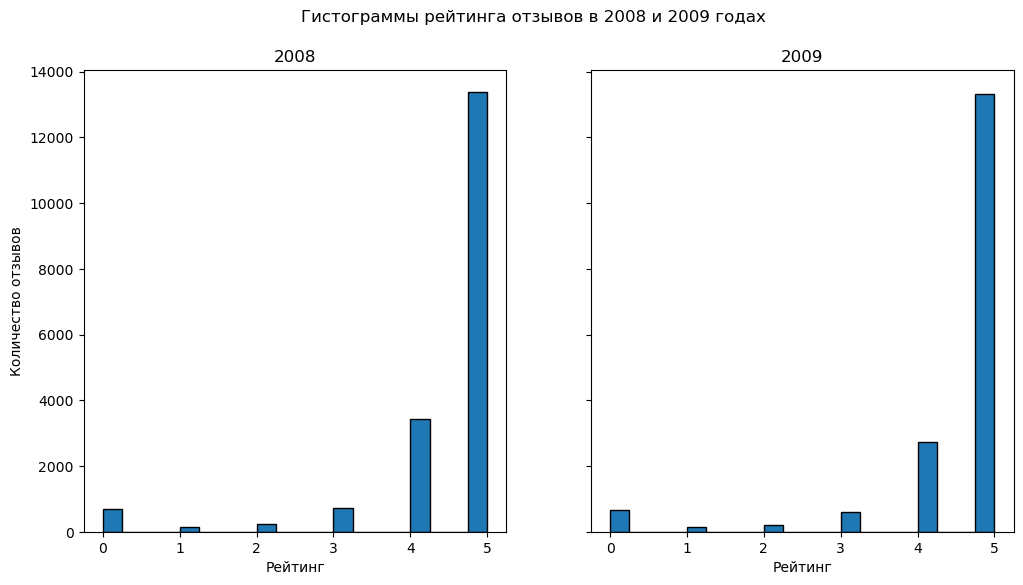

In [11]:
reviews["date"] = pd.to_datetime(reviews["date"])
reviews_2008 = reviews[reviews["date"].dt.year == 2008]
reviews_2009 = reviews[reviews["date"].dt.year == 2009]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

reviews_2008["rating"].plot.hist(ax=ax1, bins=20, edgecolor="black")
ax1.set_title("2008")
ax1.set_xlabel("Рейтинг")
ax1.set_ylabel("Количество отзывов")

reviews_2009["rating"].plot.hist(ax=ax2, bins=20, edgecolor="black")
ax2.set_title("2009")
ax2.set_xlabel("Рейтинг")

fig.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах")
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

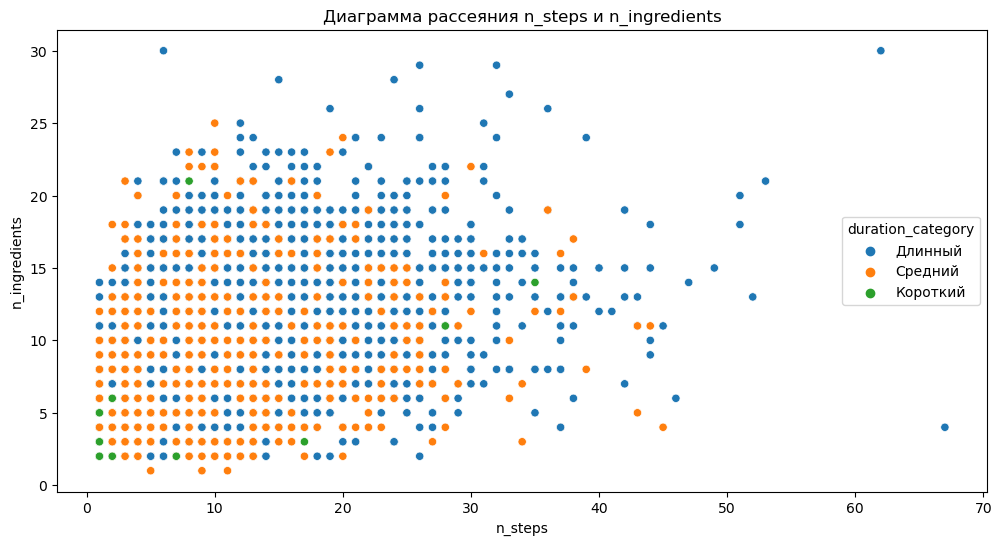

In [12]:
import seaborn as sns

def categorize_duration(minutes):
    if minutes < 5:
        return "Короткий"
    elif 5 <= minutes < 50:
        return "Средний"
    else:
        return "Длинный"

recipes["duration_category"] = recipes["minutes"].apply(categorize_duration)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=recipes, x="n_steps", y="n_ingredients", hue="duration_category")
plt.title("Диаграмма рассеяния n_steps и n_ingredients")
plt.show()

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

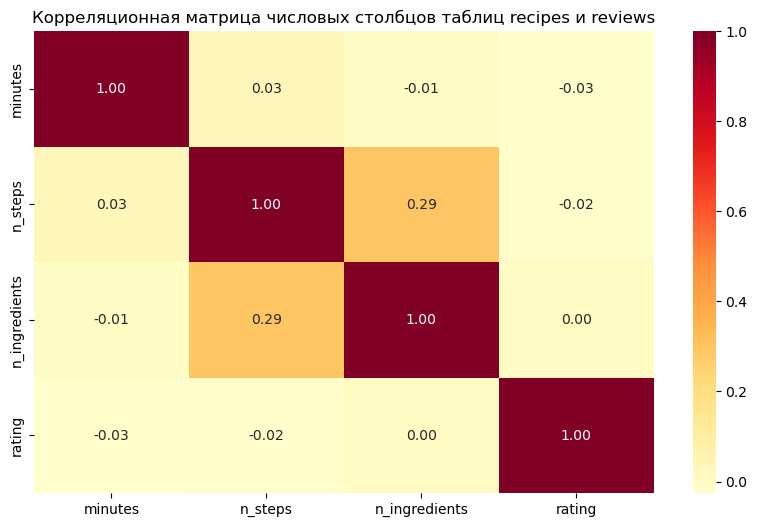

In [13]:
merged_df = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')

corr_matrix = merged_df[["minutes", "n_steps", "n_ingredients", "rating"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Корреляционная матрица числовых столбцов таблиц recipes и reviews")
plt.show()